In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import gzip
import urllib.request

In [2]:
data_url = "http://www.uvm.edu/pdodds/teaching/courses/2020-08UVM-300/docs/vocab_cs_mod.txt.gz"
with gzip.open(urllib.request.urlopen(data_url), "rb") as f:
    word_pairs = [[int(d) for d in l.decode("utf-8").split()] for l in f] # k, N_k (N_k words each appear k times in this corpus)

In [3]:
k, n_k = zip(*word_pairs)

In [4]:
print(word_pairs[0], k[0], n_k[0])
print(word_pairs[-1], k[-1], n_k[-1])

df = pd.DataFrame({"k":k, "n_k":n_k})

print(df.head())
print(df.tail())

[30578667846, 1] 30578667846 1
[200, 48030] 200 48030
             k  n_k
0  30578667846    1
1  22077031422    1
2  21594821357    1
3  19401194714    1
4  16337125274    1
          k    n_k
238586  204  46023
238587  203  48262
238588  202  46787
238589  201  48179
238590  200  48030


In [5]:
total_unique_words = df["n_k"].sum()

mean = (df["k"]*df["n_k"]).sum() / total_unique_words
moment_2 = ((df["k"]/ total_unique_words)*df["k"]*df["n_k"]).sum() # \sum k^2* N_k / \sum {n_k} = k^2 * p(k)
var = moment_2 - mean**2
std = np.sqrt(var)

print("Mean: %4E"%mean)
print("Variance: %4E\nStandard Deviation: %4E"%(var, std))



Mean: 6.165163E+04
Variance: 2.816980E+14
Standard Deviation: 1.678386E+07


In [31]:
def N_ge_k(k):
    return 3.46 * 1e8 * np.power(k, -0.661)

def N_k(k):
#     return N_ge_k(k) - N_ge_k(k+1)
    return 0.661 * 3.46 * 1e8 * np.power(k, -1.661)


interp_k = np.arange(1,200)
interp_N_k = N_k(interp_k)

K  = np.concatenate([interp_k, np.flip(df["k"].values)])
N_K = np.concatenate([interp_N_k, np.flip(df["n_k"].values)])

N_ge_K = np.sum(N_K) - np.cumsum(N_K) + 1 

X = K
Y = N_ge_K


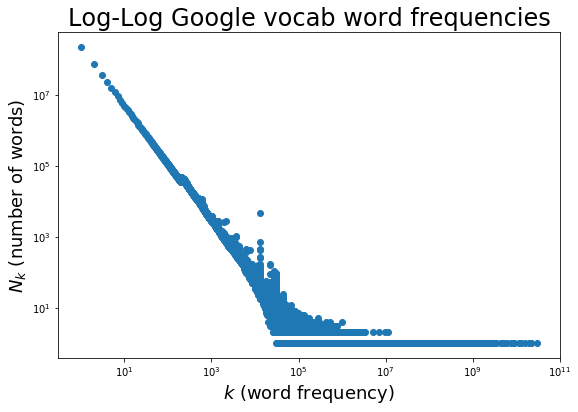

In [32]:
fig, ax = plt.subplots(1, figsize=(9,6))

ax.scatter(K, N_K, c="C0")
ax.set_xlabel(r"$k$ (word frequency)", fontsize=18)
ax.set_ylabel(r"$N_k$ (number of words)", fontsize=18)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Log-Log Google vocab word frequencies", fontsize=24)
plt.savefig("part4_N_k_k.png", bbox_inches='tight', pad_inches=0)

plt.show()

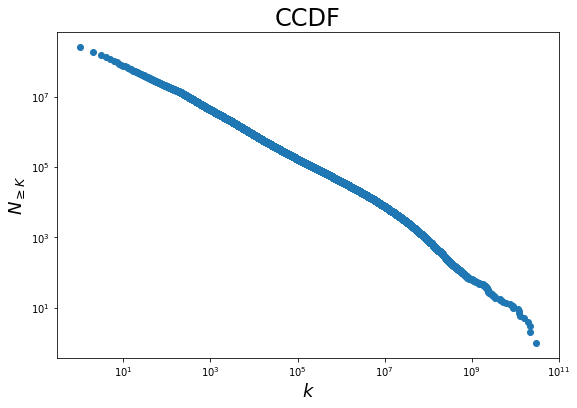

In [33]:
fig, ax = plt.subplots(1, figsize=(9,6))

ax.scatter(X, Y, c="C0")
ax.set_ylabel(r"$N_{ \geq K}$", fontsize=18)
ax.set_xlabel(r"$k$", fontsize=18)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("CCDF", fontsize=24)
plt.savefig("part4_CCDF.png", bbox_inches='tight', pad_inches=0)

plt.show()

In [34]:
total_unique_words = np.sum(N_K)
total_words = np.sum(K  * N_K)
mean = np.sum(K * N_K)/ total_unique_words
moment_2 = np.sum(K * (1/total_unique_words) * K * N_K)
var = moment_2 - mean**2
std = np.sqrt(var)

total_words_left_out = np.sum(N_K[:199]* K[:199]) # sum of 1 to 199 of number of words that each appear k times * k.

print("Total Unique Words: %4E"%total_unique_words)
print("Mean: %4E"%mean)
print("Variance: %4E\nStandard Deviation: %4E"%(var, std))
print(r"Words appearing once / total number of words =  \frac{%d}{%d} \approx %.4E \approx %.2f%%"%(N_K[0], total_words, N_K[0]/ total_words, N_K[0]* 100 / total_words))
print(r"Total number of unique words / total number of words = \frac{%d}{%d} \approx %.4E \approx %.2f\%%"%(total_unique_words, total_words, total_unique_words / total_words, total_unique_words * 100 / total_words))
print(r"Words appearing once / total number unique of words =  \frac{%d}{%d} \approx %.4E \approx %.2f%%"%(N_K[0], total_unique_words, N_K[0]/ total_unique_words, N_K[0]* 100/ total_unique_words))
print(r"Words left out of google dataset / total words in reconstructed dataset = \frac{%d}{%d} \approx %.4E \approx %.2f%%"%(round(total_words_left_out), total_words, total_words_left_out/total_words,total_words_left_out* 100/total_words ))

Total Unique Words: 4.916132E+08
Mean: 1.704916E+03
Variance: 7.757529E+12
Standard Deviation: 2.785234E+06
Words appearing once / total number of words =  \frac{228706000}{838159275194} \approx 2.7287E-04 \approx 0.03%
Total number of unique words / total number of words = \frac{491613238}{838159275194} \approx 5.8654E-04 \approx 0.06\%
Words appearing once / total number unique of words =  \frac{228706000}{491613238} \approx 4.6522E-01 \approx 46.52%
Words left out of google dataset / total words in reconstructed dataset = \frac{3513768987}{838159275194} \approx 4.1922E-03 \approx 0.42%


In [35]:
total_words

838159275194.1433